In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [5]:
df.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


In [6]:
df=df.drop(['applicant_id'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

Some of the column showing INT data types but it should be object data types. therefore converting them into object data types.

In [8]:
df['years_of_insurance_with_us']=df['years_of_insurance_with_us'].astype('object')
df['adventure_sports']=df['adventure_sports'].astype('object')
df['visited_doctor_last_1_year']=df['visited_doctor_last_1_year'].astype('object')
df['heart_decs_history']=df['heart_decs_history'].astype('object')
df['other_major_decs_history']=df['other_major_decs_history'].astype('object')
df['Year_last_admitted']=df['Year_last_admitted'].astype('object')
df['other_major_decs_history']=df['other_major_decs_history'].astype('object')
df['other_major_decs_history']=df['other_major_decs_history'].astype('object')
df['other_major_decs_history']=df['other_major_decs_history'].astype('object')
df['regular_checkup_lasy_year']=df['regular_checkup_lasy_year'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  object 
 1   regular_checkup_lasy_year       25000 non-null  object 
 2   adventure_sports                25000 non-null  object 
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  object 
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  object 
 9   other_major_decs_history        25000 non-null  object 
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

### Missing value

In [10]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

Since we have almost 50% of missing data for year_last_admitted column we will drop the column coz we cannot afford to have 50% manupulated data. however BMI has only 3% of missing data and we can treat these missing value. 

In [11]:
df=df.drop(['Year_last_admitted'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  object 
 1   regular_checkup_lasy_year       25000 non-null  object 
 2   adventure_sports                25000 non-null  object 
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  object 
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  object 
 9   other_major_decs_history        25000 non-null  object 
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

### Treating Missing value

In [13]:
df_median=df['bmi'].median()

In [14]:
df['bmi']=df['bmi'].fillna(value=df_median)

In [15]:
df.head(10)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,4866,28,1,0,...,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,...,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,...,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,...,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,...,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616
5,8,0,0,Salried,2,225 to 250,5306,39,0,0,...,38.0,Unknown,Bhubaneswar,78,Y,Rare,No,3,13,39488
6,8,0,0,Student,4,125 to 150,4676,40,0,0,...,28.7,never smoked,Guwahati,81,N,No,Moderate,3,16,37020
7,1,0,0,Student,4,150 to 175,7448,46,0,0,...,26.0,smokes,Chennai,72,N,Rare,Moderate,0,34,29616
8,8,1,0,Salried,4,125 to 150,5632,45,0,0,...,24.4,smokes,Mumbai,67,Y,Rare,No,1,12,22212
9,4,3,0,Salried,3,125 to 150,4130,38,0,0,...,46.0,formerly smoked,Nagpur,63,N,Daily,Moderate,0,12,8638


### checking duplicate value

In [16]:
df.duplicated().sum()

0

In [17]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
   
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [19]:
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

8

In [20]:
df_num.describe()

,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,5215.889320,44.918320,167.530000,31.357952,71.610480,2.517960,28.812280,27147.407680
std,1053.179748,16.107492,62.729712,7.720963,9.325183,1.690335,8.632382,14323.691832
min,2034.000000,16.000000,57.000000,12.300000,52.000000,0.000000,11.000000,2468.000000
25%,4543.000000,31.000000,113.000000,26.300000,64.000000,1.000000,21.000000,16042.000000
50%,5089.000000,45.000000,168.000000,30.500000,72.000000,3.000000,31.000000,27148.000000
75%,5730.000000,59.000000,222.000000,35.300000,78.000000,4.000000,36.000000,37020.000000
max,11255.000000,74.000000,277.000000,100.600000,96.000000,6.000000,42.000000,67870.000000


In [21]:
lstnumericcolumns

['daily_avg_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'insurance_cost']

Description of daily_avg_steps
----------------------------------------------------------------------------
count    25000.000000
mean      5215.889320
std       1053.179748
min       2034.000000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max      11255.000000
Name: daily_avg_steps, dtype: float64 Distribution of daily_avg_steps
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


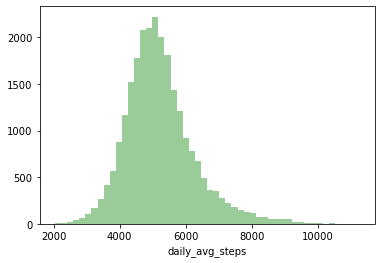

BoxPlot of daily_avg_steps
----------------------------------------------------------------------------


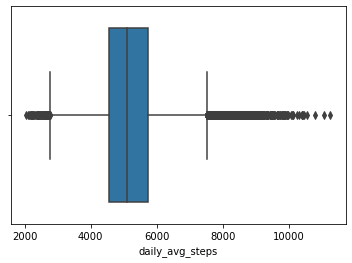

Description of age
----------------------------------------------------------------------------
count    25000.000000
mean        44.918320
std         16.107492
min         16.000000
25%         31.000000
50%         45.000000
75%         59.000000
max         74.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


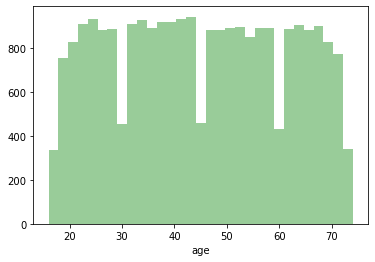

BoxPlot of age
----------------------------------------------------------------------------


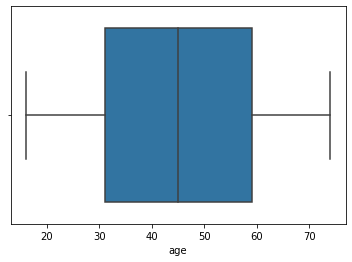

Description of avg_glucose_level
----------------------------------------------------------------------------
count    25000.000000
mean       167.530000
std         62.729712
min         57.000000
25%        113.000000
50%        168.000000
75%        222.000000
max        277.000000
Name: avg_glucose_level, dtype: float64 Distribution of avg_glucose_level
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


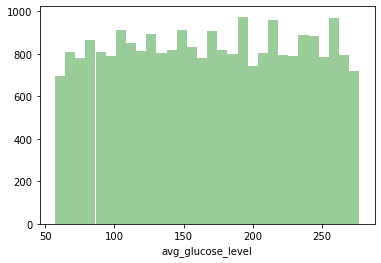

BoxPlot of avg_glucose_level
----------------------------------------------------------------------------


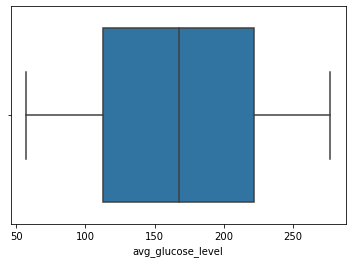

Description of bmi
----------------------------------------------------------------------------
count    25000.000000
mean        31.357952
std          7.720963
min         12.300000
25%         26.300000
50%         30.500000
75%         35.300000
max        100.600000
Name: bmi, dtype: float64 Distribution of bmi
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


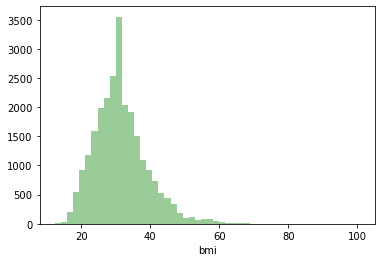

BoxPlot of bmi
----------------------------------------------------------------------------


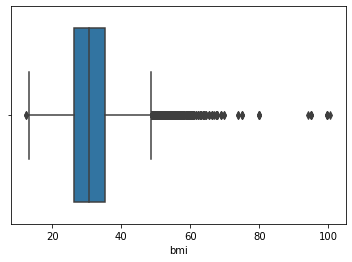

Description of weight
----------------------------------------------------------------------------
count    25000.000000
mean        71.610480
std          9.325183
min         52.000000
25%         64.000000
50%         72.000000
75%         78.000000
max         96.000000
Name: weight, dtype: float64 Distribution of weight
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


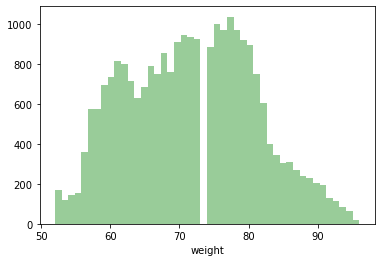

BoxPlot of weight
----------------------------------------------------------------------------


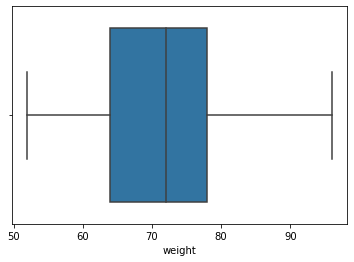

Description of weight_change_in_last_one_year
----------------------------------------------------------------------------
count    25000.000000
mean         2.517960
std          1.690335
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weight_change_in_last_one_year, dtype: float64 Distribution of weight_change_in_last_one_year
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


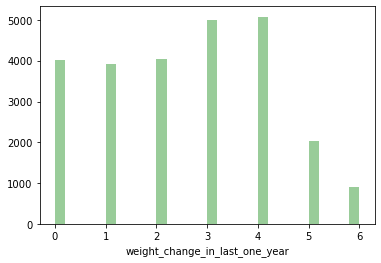

BoxPlot of weight_change_in_last_one_year
----------------------------------------------------------------------------


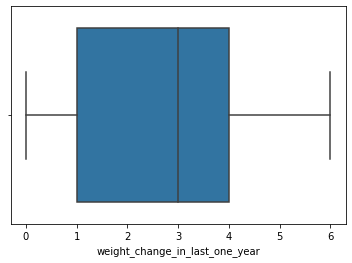

Description of fat_percentage
----------------------------------------------------------------------------
count    25000.000000
mean        28.812280
std          8.632382
min         11.000000
25%         21.000000
50%         31.000000
75%         36.000000
max         42.000000
Name: fat_percentage, dtype: float64 Distribution of fat_percentage
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


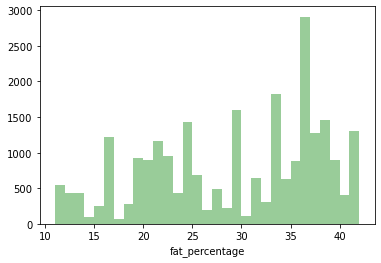

BoxPlot of fat_percentage
----------------------------------------------------------------------------


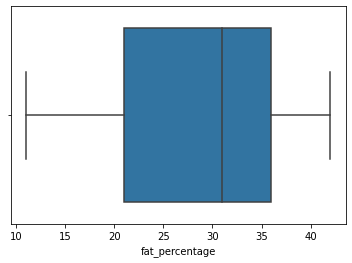

Description of insurance_cost
----------------------------------------------------------------------------
count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64 Distribution of insurance_cost
----------------------------------------------------------------------------


D:\PGDM\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


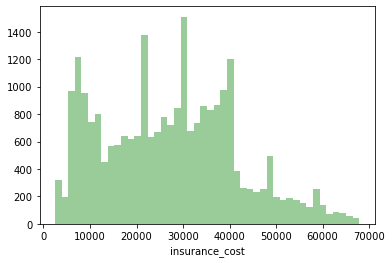

BoxPlot of insurance_cost
----------------------------------------------------------------------------


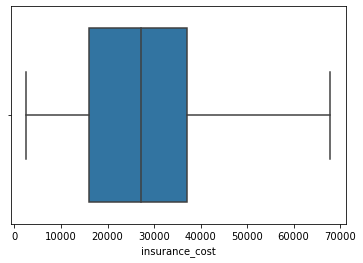

In [22]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [23]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [24]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'Occupation',
 'visited_doctor_last_1_year',
 'cholesterol_level',
 'heart_decs_history',
 'other_major_decs_history',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise']

Details of years_of_insurance_with_us
----------------------------------------------------------------
3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: years_of_insurance_with_us, dtype: int64


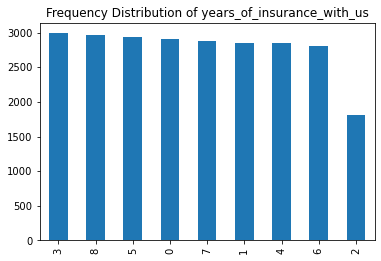

       
Details of regular_checkup_lasy_year
----------------------------------------------------------------
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: regular_checkup_lasy_year, dtype: int64


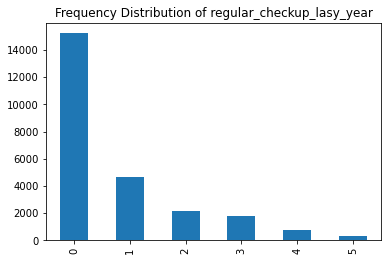

       
Details of adventure_sports
----------------------------------------------------------------
0    22957
1     2043
Name: adventure_sports, dtype: int64


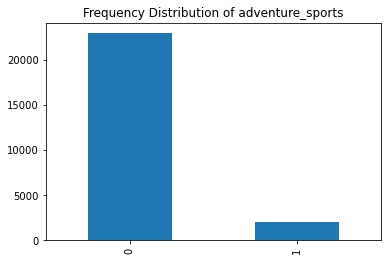

       
Details of Occupation
----------------------------------------------------------------
Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64


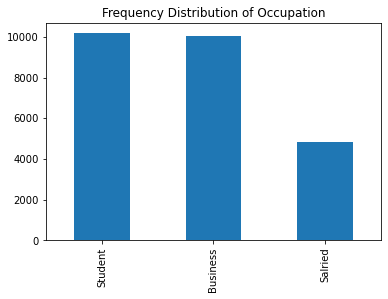

       
Details of visited_doctor_last_1_year
----------------------------------------------------------------
2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
0        1
12       1
Name: visited_doctor_last_1_year, dtype: int64


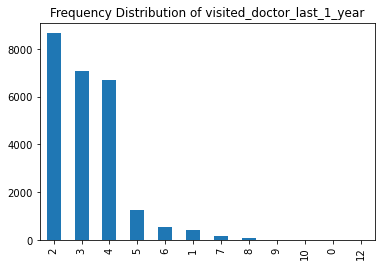

       
Details of cholesterol_level
----------------------------------------------------------------
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64


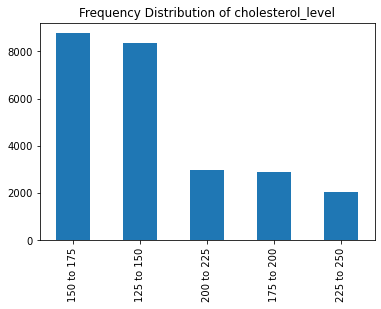

       
Details of heart_decs_history
----------------------------------------------------------------
0    23634
1     1366
Name: heart_decs_history, dtype: int64


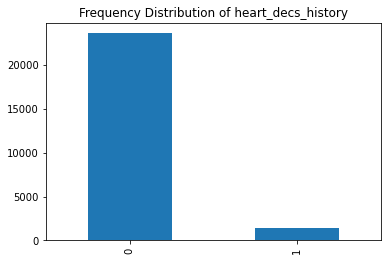

       
Details of other_major_decs_history
----------------------------------------------------------------
0    22546
1     2454
Name: other_major_decs_history, dtype: int64


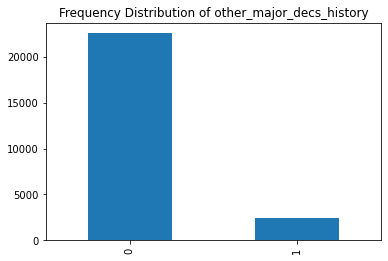

       
Details of Gender
----------------------------------------------------------------
Male      16422
Female     8578
Name: Gender, dtype: int64


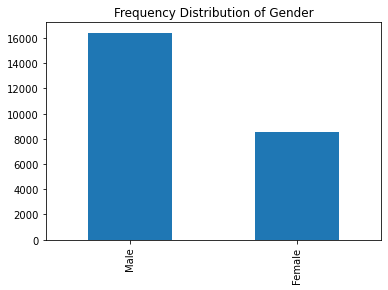

       
Details of smoking_status
----------------------------------------------------------------
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64


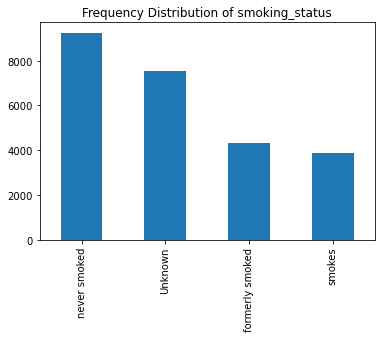

       
Details of Location
----------------------------------------------------------------
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64


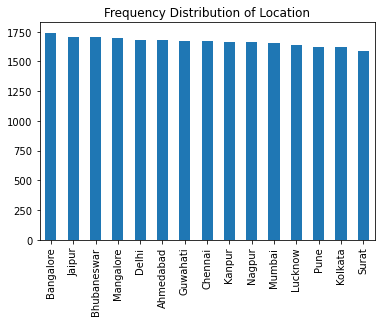

       
Details of covered_by_any_other_company
----------------------------------------------------------------
N    17418
Y     7582
Name: covered_by_any_other_company, dtype: int64


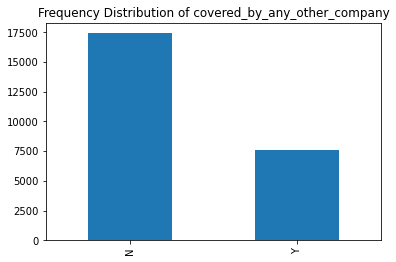

       
Details of Alcohol
----------------------------------------------------------------
Rare     13752
No        8541
Daily     2707
Name: Alcohol, dtype: int64


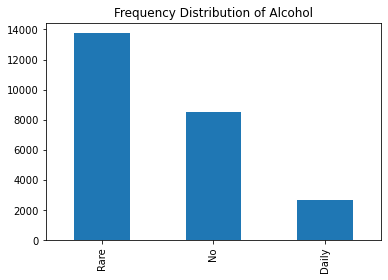

       
Details of exercise
----------------------------------------------------------------
Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64


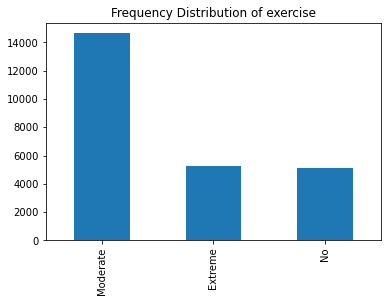

In [25]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [26]:
corr = df.corr(method='pearson')

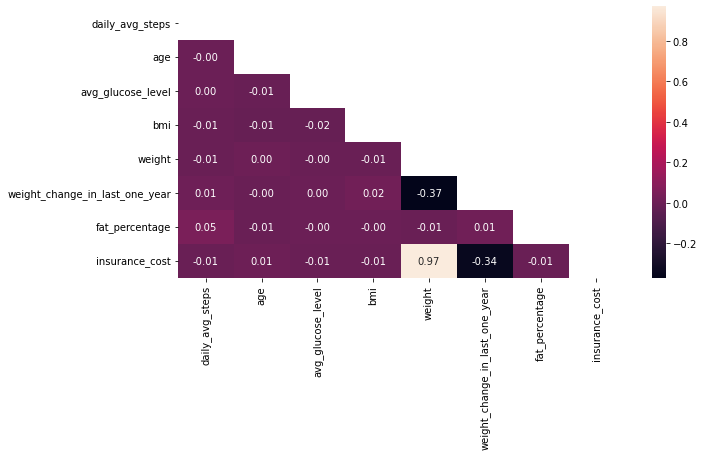

In [27]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

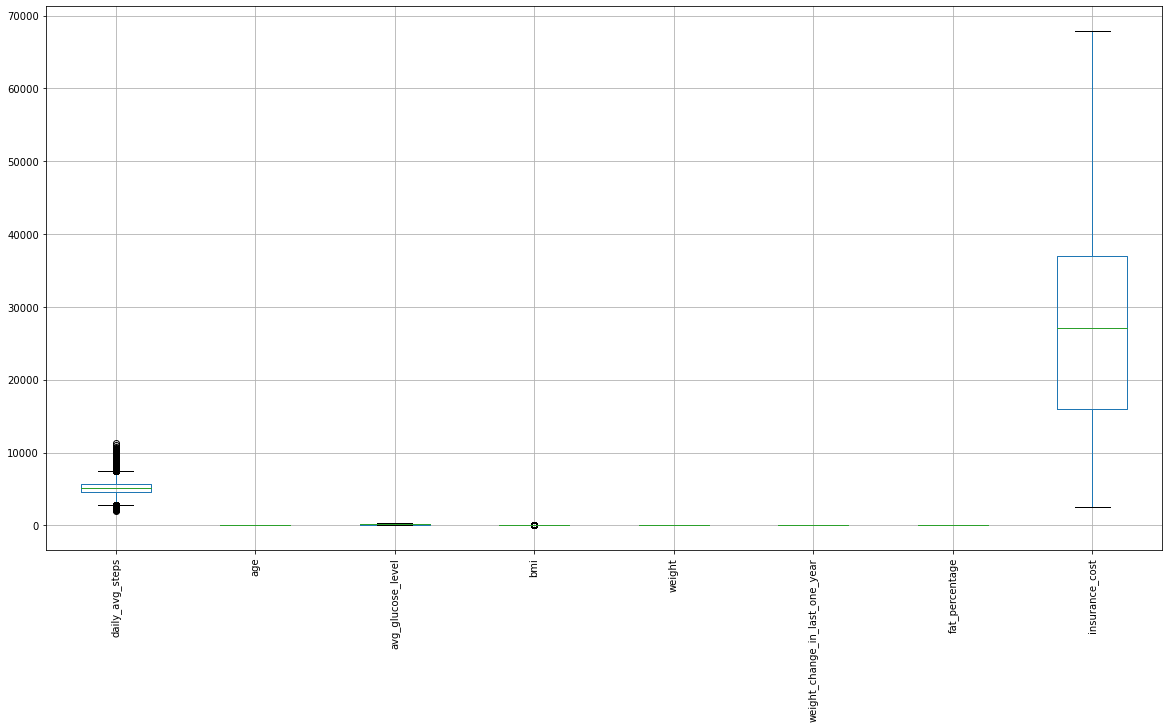

In [28]:
df_num.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

There we can see outlier for daily_avergae_steps variable and small outlier for BMI since there is just 1-2 people falling on such categories, we can keep the data whereas for daily_avergae_steps it is quite possible that people who are more active or do extreme exercise can walk more than 10000 steps so we don’t want to lose such valid information by treating them. Hence, we are not treating outliers. It seems all are valid.

In [29]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: years_of_insurance_with_us
[3, 0, 1, 7, 8, 4, 6, 5, 2]
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]
[3 0 1 7 8 4 6 5 2]


feature: regular_checkup_lasy_year
[1, 0, 4, 3, 2, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
[1 0 4 3 2 5]


feature: adventure_sports
[1, 0]
Categories (2, int64): [0, 1]
[1 0]


feature: Occupation
['Salried', 'Student', 'Business']
Categories (3, object): ['Business', 'Salried', 'Student']
[1 2 0]


feature: visited_doctor_last_1_year
[2, 4, 3, 5, 1, ..., 6, 10, 9, 12, 0]
Length: 12
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 12]
[ 2  4  3  5  1  8  7  6 10  9 11  0]


feature: cholesterol_level
['125 to 150', '150 to 175', '200 to 225', '175 to 200', '225 to 250']
Categories (5, object): ['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250']
[0 1 3 2 4]


feature: heart_decs_history
[1, 0]
Categories (2, int64): [0, 1]
[1 0]


feature: other_major_decs_history
[0, 1]
Categories (2, int64): [0, 1]
[0 1]


feature: Gen

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int8   
 1   regular_checkup_lasy_year       25000 non-null  int8   
 2   adventure_sports                25000 non-null  int8   
 3   Occupation                      25000 non-null  int8   
 4   visited_doctor_last_1_year      25000 non-null  int8   
 5   cholesterol_level               25000 non-null  int8   
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int8   
 9   other_major_decs_history        25000 non-null  int8   
 10  Gender                          25000 non-null  int8   
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [31]:
df=df.drop(['Location'], axis=1)

### Scaling the data 

In [32]:
from scipy.stats import zscore
df_scaling=df.apply(zscore)
df_scaling.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,-0.417807,0.188690,3.352150,-0.006632,-0.967419,-1.002742,-0.332228,-1.050360,4.159520,-0.329915,...,-1.124370,-0.020458,-1.284920,-0.494422,-0.659770,0.820197,0.008326,-0.898041,-0.441634,-0.430722
1,-1.568750,-0.645043,-0.298316,1.106181,0.784898,-0.210186,1.134787,0.315492,-0.240412,-0.329915,...,0.708929,0.368102,-0.351871,-1.459569,-0.659770,0.820197,0.008326,0.285180,-0.209944,-1.464554
2,-1.185102,-0.645043,-0.298316,-1.119445,0.784898,1.374926,-0.671209,1.433007,-0.240412,-0.329915,...,-0.024391,1.171127,-0.351871,0.149010,-0.659770,-2.118525,-1.545002,-1.489652,0.369282,0.086194
3,1.116783,2.689890,-0.298316,-1.119445,-0.967419,0.582370,0.947731,0.377576,-0.240412,-0.329915,...,-0.933069,-1.095475,-1.284920,-0.065467,1.515679,0.820197,1.561654,0.285180,0.948508,0.000041
4,-0.417807,0.188690,-0.298316,1.106181,-0.967419,-0.210186,-0.263863,-0.057013,-0.240412,3.031081,...,-0.789594,-0.629202,0.581177,0.256249,-0.659770,-0.649164,-1.545002,-1.489652,0.600972,0.172347


In [33]:
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_lasy_year       25000 non-null  float64
 2   adventure_sports                25000 non-null  float64
 3   Occupation                      25000 non-null  float64
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   cholesterol_level               25000 non-null  float64
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  float64
 8   heart_decs_history              25000 non-null  float64
 9   other_major_decs_history        25000 non-null  float64
 10  Gender                          25000 non-null  float64
 11  avg_glucose_level               25000 non-null  float64
 12  bmi                             

### saving final dataset for model building

In [42]:
df_scaling.to_csv('processed_data.csv', index=False)

### further Analysis by clustering the data

In [35]:
from sklearn.cluster import KMeans

In [36]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=1) 

In [37]:
k_means.fit(df_scaling)

KMeans(n_clusters=3, random_state=1)

In [38]:
# Get the labels
k_means.labels_

array([2, 2, 0, ..., 1, 0, 2])

In [40]:
df["Clus_kmeans3"] = k_means.labels_
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,Clus_kmeans3
0,3,1,1,1,2,0,4866,28,1,0,...,31.2,0,67,0,2,1,1,25,20978,2
1,0,0,0,2,4,1,6411,50,0,0,...,34.2,1,58,0,2,1,3,27,6170,2
2,1,0,0,0,4,3,4509,68,0,0,...,40.4,1,73,0,0,0,0,32,28382,0
3,7,4,0,0,2,2,6214,51,0,0,...,22.9,0,71,1,2,2,3,37,27148,2
4,3,1,0,2,2,1,4938,44,0,1,...,26.5,2,74,0,1,0,0,34,29616,1
